___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Plotly and Cufflinks

Plotly is a library that allows you to create interactive plots that you can use in dashboards or websites (you can save them as html files or static images).

## Installation

In order for this all to work, you'll need to install plotly and cufflinks to call plots directly off of a pandas dataframe. These libraries are not currently available through **conda** but are available through **pip**. Install the libraries at your command line/terminal using:

    pip install plotly
    pip install cufflinks

** NOTE: Make sure you only have one installation of Python on your computer when you do this, otherwise the installation may not work. **

## Imports and Set-up

In [49]:
import pandas as pd
import numpy as np
import plotly.express as px
%matplotlib inline

In [32]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

5.24.1


In [33]:
import cufflinks as cf

In [34]:
# For Notebooks
init_notebook_mode(connected=True)

In [35]:
# For offline use
cf.go_offline()

### Fake Data

In [51]:
df = pd.DataFrame(np.random.randn(100,4),columns='A B C D'.split())

In [37]:
df.head()

,A,B,C,D
0,-0.975060,0.475541,-1.210816,-1.447032
1,0.426474,-0.363727,2.137640,0.718770
2,-2.130095,-0.735079,0.753159,-0.181000
3,-0.241994,-0.419420,0.191314,-0.767229
4,1.890095,-0.356124,-1.341090,2.082206


In [38]:
df2 = pd.DataFrame({'Category':['A','B','C'],'Values':[32,43,50]})

In [39]:
df2.head()

,Category,Values
0,A,32
1,B,43
2,C,50


## Using Cufflinks and iplot()

* scatter
* bar
* box
* spread
* ratio
* heatmap
* surface
* histogram
* bubble

## Scatter

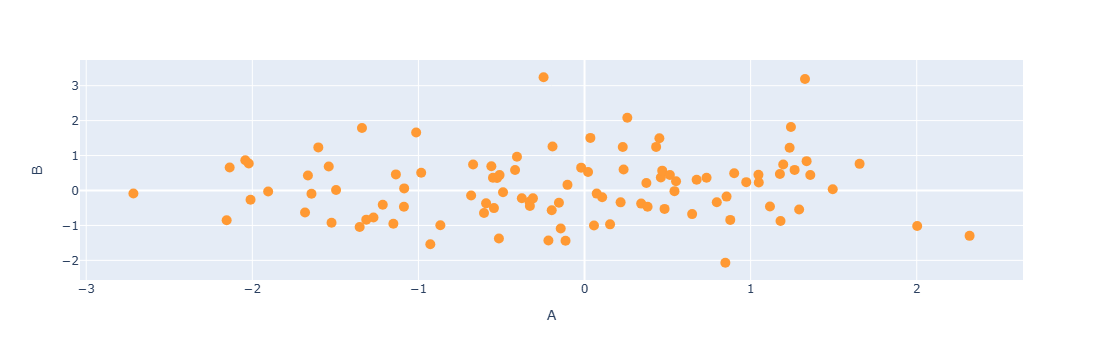

In [54]:
fig = px.scatter(
    df,
    x='A',
    y='B',
    color_discrete_sequence=['rgba(255, 153, 51, 1.0)'],  # Match your color
    size_max=10  # Use size_max if you have a size column; otherwise, set marker size below
)
fig.update_traces(marker=dict(size=10))
 
# Show the plot
fig.show()

## Bar Plots

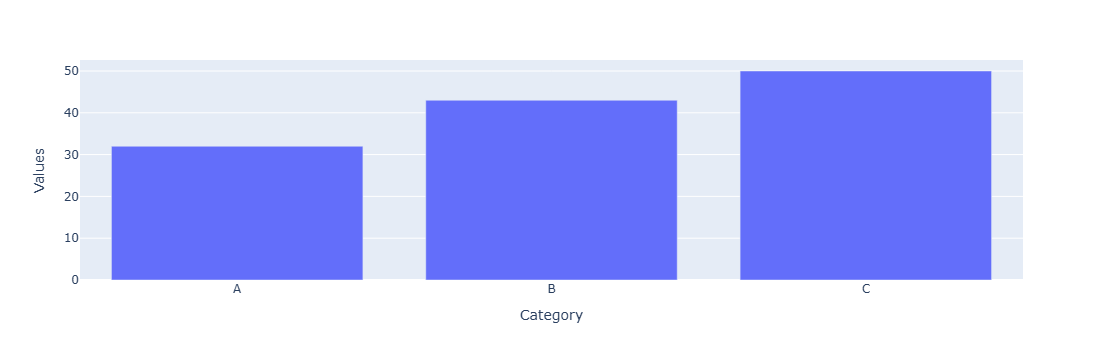

In [59]:
#df2.iplot(kind='bar',x='Category',y='Values')
 
fig = px.bar(df2,x='Category',y='Values')
 
fig.show()

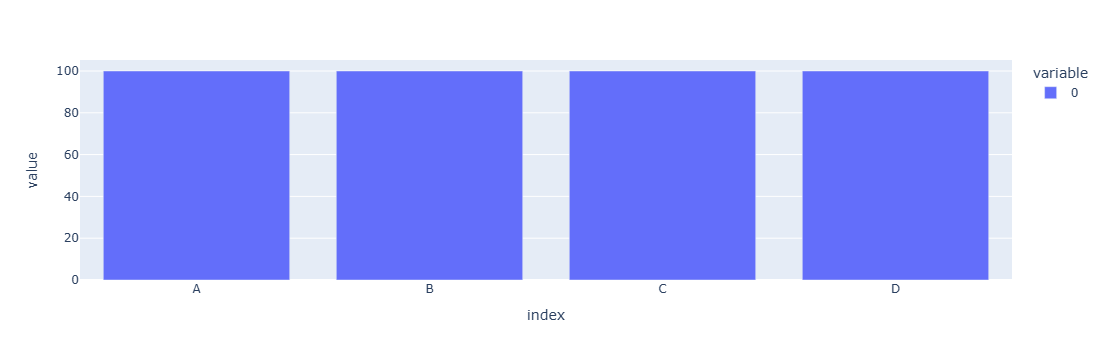

In [60]:
#df.count()
fig = px.bar(df.count())
fig.show()

## Boxplots

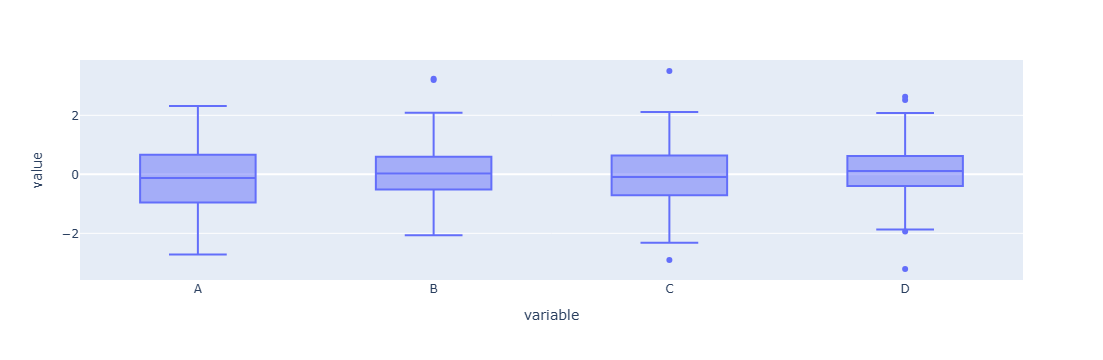

In [61]:
#df.iplot(kind='box')
fig = px.box(df)
fig.show()

## 3d Surface

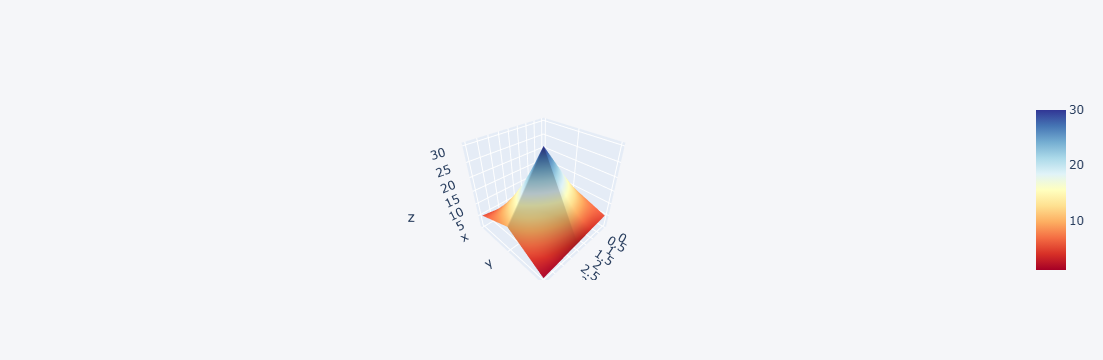

In [44]:
df3 = pd.DataFrame({'x':[1,2,3,4,5],'y':[10,20,30,20,10],'z':[5,4,3,2,1]})
df3.iplot(kind='surface',colorscale='rdylbu')

## Spread

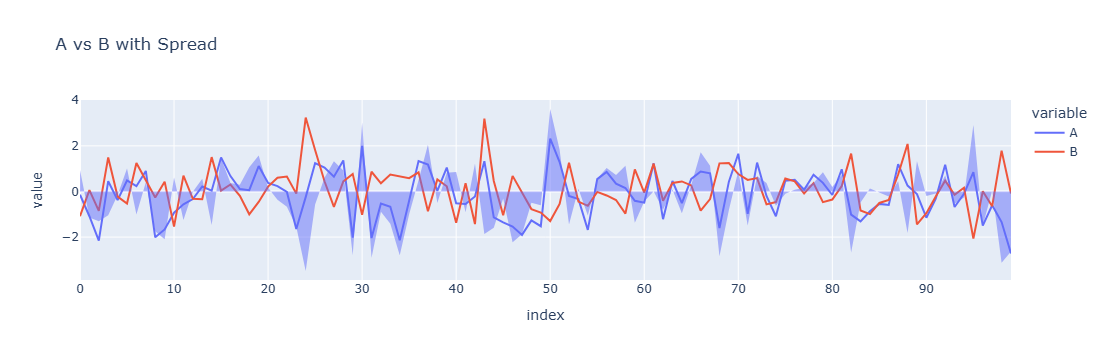

In [63]:
#df[['A','B']].iplot(kind='spread')
# Compute the spread (difference)
df["Spread"] = df["A"] - df["B"]

# Plot A and B as lines
fig = px.line(df, y=["A", "B"], title="A vs B with Spread")

# Add shaded spread area
fig.add_traces(
    px.area(df, y="Spread").update_traces(name="Spread", line=dict(width=0)).data
)

fig.show()

## histogram

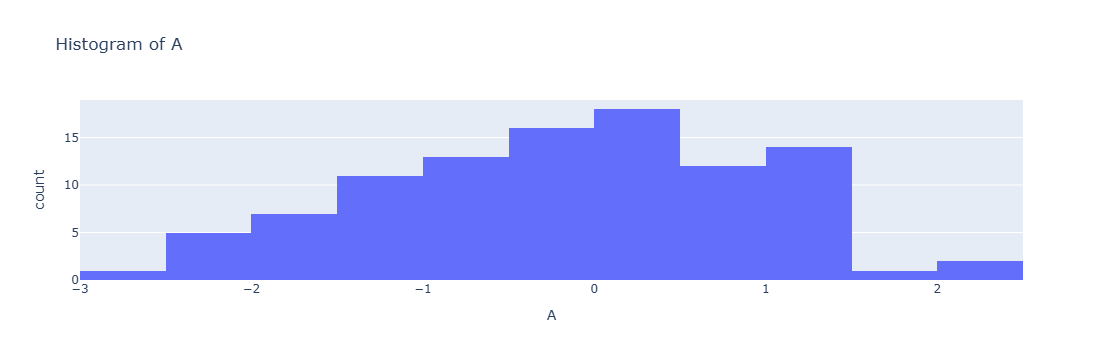

In [65]:
#df['A'].iplot(kind='hist',bins=25)
fig = px.histogram(df, x="A", nbins=25, title="Histogram of A")
fig.show()

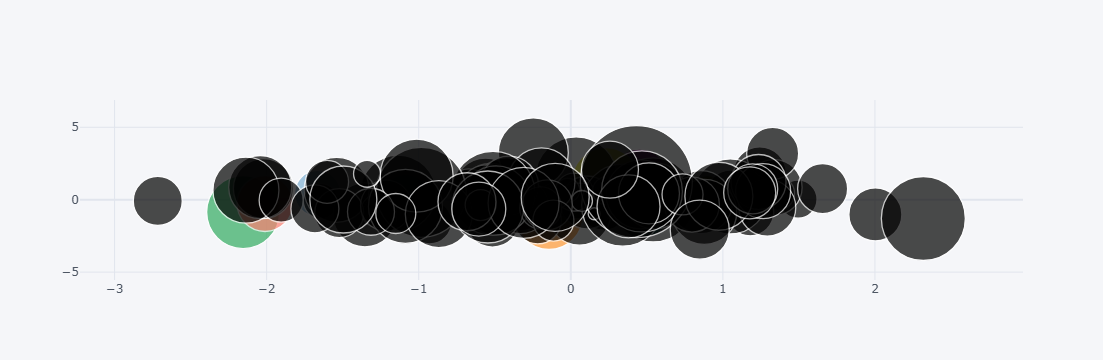

In [66]:
df.iplot(kind='bubble',x='A',y='B',size='C')

## scatter_matrix()

Similar to sns.pairplot()

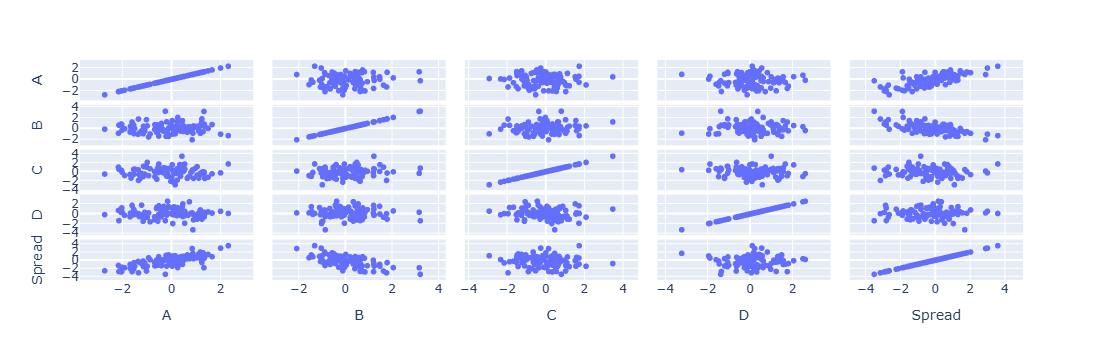

In [68]:
#df.scatter_matrix()
fig = px.scatter_matrix(df, dimensions=df.columns)
fig.show()

# Great Job!